# Kernel signatures

Heat and wave-kernel signatures provide an upgrade to simply looking at laplacian shape spectra as we did it in [this notebook](spectral_analysis.ipynb). They are based on the heat and wave kernels, which are the fundamental solutions to the heat and wave equations. In essence, they are based on the following principles:

* **Heat kernel signature**: Uses the Laplacian eigenvalues and vectors to solve the heat diffusion equation. The heat kernel signature is the solution to the heat equation at a fixed time $t$.
* **Wave kernel signature**: Uses the Laplacian eigenvalues and vectors to solve the wave equation. The wave kernel signature is the solution to the Schrödinger equation at a fixed energy level $E$.

In [1]:
import vedo
import napari_shape_odyssey as nso
import napari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold, cluster, preprocessing

In [2]:
viewer = napari.Viewer(ndisplay=3)

## Heat kernel
### Basic shapes

Let's first again see what these do for the basic shapes.

In [3]:
ellipsoid1 = vedo.Ellipsoid(pos=(0,0,0), axis1=(1,0,0), axis2=(0,1,0), axis3=(0,0,1), c='r', alpha=0.5).triangulate().clean()
ellipsoid2 = vedo.Ellipsoid(pos=(0,0,0), axis1=(1,0,0), axis2=(0,1,0), axis3=(0,0,2), c='r', alpha=0.5).triangulate().clean()
ellipsoid3 = vedo.Ellipsoid(pos=(0,0,0), axis1=(1,0,0), axis2=(0,2,0), axis3=(0,0,2), c='r', alpha=0.5).triangulate().clean()
cube = vedo.Cube(pos=(0,0,0), side=1, c='b', alpha=0.5).triangulate().clean().subdivide(method=1, n=3)

ellipsoid1.name = 'ellipsoid1'
ellipsoid2.name = 'ellipsoid2'
ellipsoid3.name = 'ellipsoid3'
shapes = [ellipsoid1, ellipsoid2, ellipsoid3, cube]

In [4]:
times = np.linspace(0, 15, 40)
t_visualize = np.arange(0, len(times), 7)
times

array([ 0.        ,  0.38461538,  0.76923077,  1.15384615,  1.53846154,
        1.92307692,  2.30769231,  2.69230769,  3.07692308,  3.46153846,
        3.84615385,  4.23076923,  4.61538462,  5.        ,  5.38461538,
        5.76923077,  6.15384615,  6.53846154,  6.92307692,  7.30769231,
        7.69230769,  8.07692308,  8.46153846,  8.84615385,  9.23076923,
        9.61538462, 10.        , 10.38461538, 10.76923077, 11.15384615,
       11.53846154, 11.92307692, 12.30769231, 12.69230769, 13.07692308,
       13.46153846, 13.84615385, 14.23076923, 14.61538462, 15.        ])

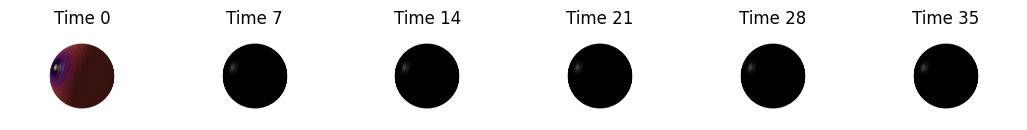

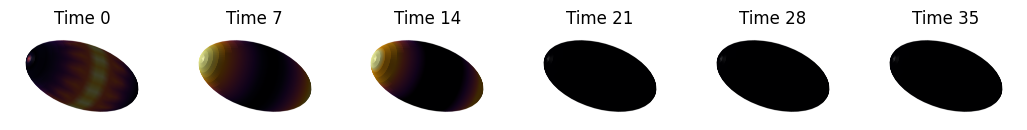

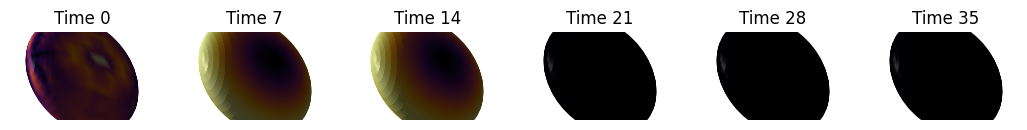

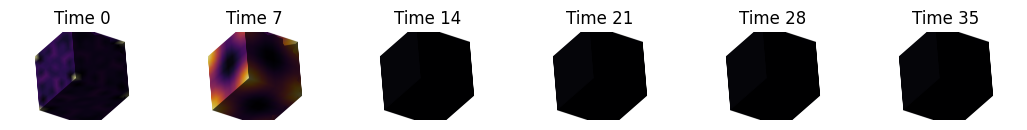

In [5]:
for shape in shapes:
    fig, axes = plt.subplots(ncols=len(t_visualize), figsize=(13, 7))
    signature = nso.signatures.heat_kernel_signature((shape.points(), shape.faces()), times)
    for i in range(len(t_visualize)):
        
        mesh_tuple = (shape.points(), np.asarray(shape.faces()), signature[:, t_visualize[i]])
        layer = viewer.add_surface(mesh_tuple, colormap='inferno', name=f'{shape.name} HKS t={t_visualize[i]}')
        viewer.camera.angles = (-18, -30, 130)
        viewer.camera.zoom = 710
        screenshot = viewer.screenshot()
        layer.visible = False
        axes[i].imshow(screenshot)
        axes[i].axis('off')
        axes[i].set_title(f'Time {t_visualize[i]}')

### More complex shapes

In [6]:
shape1 = vedo.load(vedo.dataurl+"cessna.vtk").triangulate().clean()
shape2 = vedo.load(vedo.dataurl+"cow.vtk").triangulate().clean().scale(2)

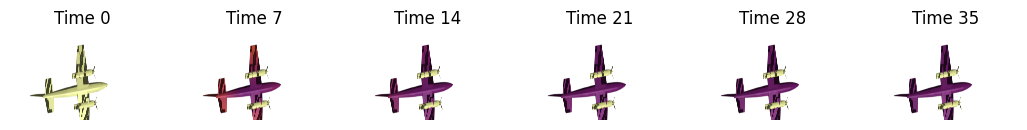

In [7]:
signature = nso.signatures.heat_kernel_signature((shape1.points(), np.asarray(shape1.faces())), times=times)
fig, axes = plt.subplots(ncols=len(t_visualize), figsize=(13, 7))

for i in range(len(t_visualize)):
    mesh_tuple = (shape1.points(), np.asarray(shape1.faces()), signature[:, t_visualize[i]])
    layer = viewer.add_surface(mesh_tuple, colormap='inferno', contrast_limits=[0.0, 0.03], name=f'Cessna HKS t={t_visualize[i]}')
    viewer.camera.angles = (168, -54, 109)
    viewer.camera.zoom = 250
    viewer.camera.center = (-0.175, 0.621, -0.119)
    screenshot = viewer.screenshot()
    layer.visible = False
    axes[i].imshow(screenshot)
    axes[i].axis('off')
    axes[i].set_title(f'Time {t_visualize[i]}')

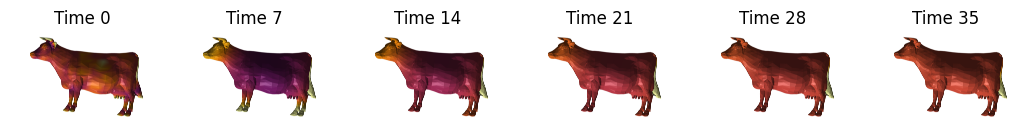

In [8]:
signature = nso.signatures.heat_kernel_signature((shape2.points(), np.asarray(shape2.faces())), times=times)
fig, axes = plt.subplots(ncols=len(t_visualize), figsize=(13, 7))

for i in range(len(t_visualize)):
    mesh_tuple = (shape2.points(), np.asarray(shape2.faces()), signature[:, t_visualize[i]])
    layer = viewer.add_surface(mesh_tuple, colormap='inferno', contrast_limits=[0.0, 0.06], name=f'Cow HKS t={t_visualize[i]}')
    viewer.camera.angles = (86, 0, -15)
    viewer.camera.zoom = 250
    viewer.camera.center = (-0.175, 0.621, -0.119)
    screenshot = viewer.screenshot()
    layer.visible = False
    axes[i].imshow(screenshot)
    axes[i].axis('off')
    axes[i].set_title(f'Time {t_visualize[i]}')

### Plot some signatures

In [9]:
point1 = shape2.faces()[5355][2]
point2 = shape2.faces()[3757][2]
point3 = shape2.faces()[3385][2]
point4 = shape2.faces()[4520][2]

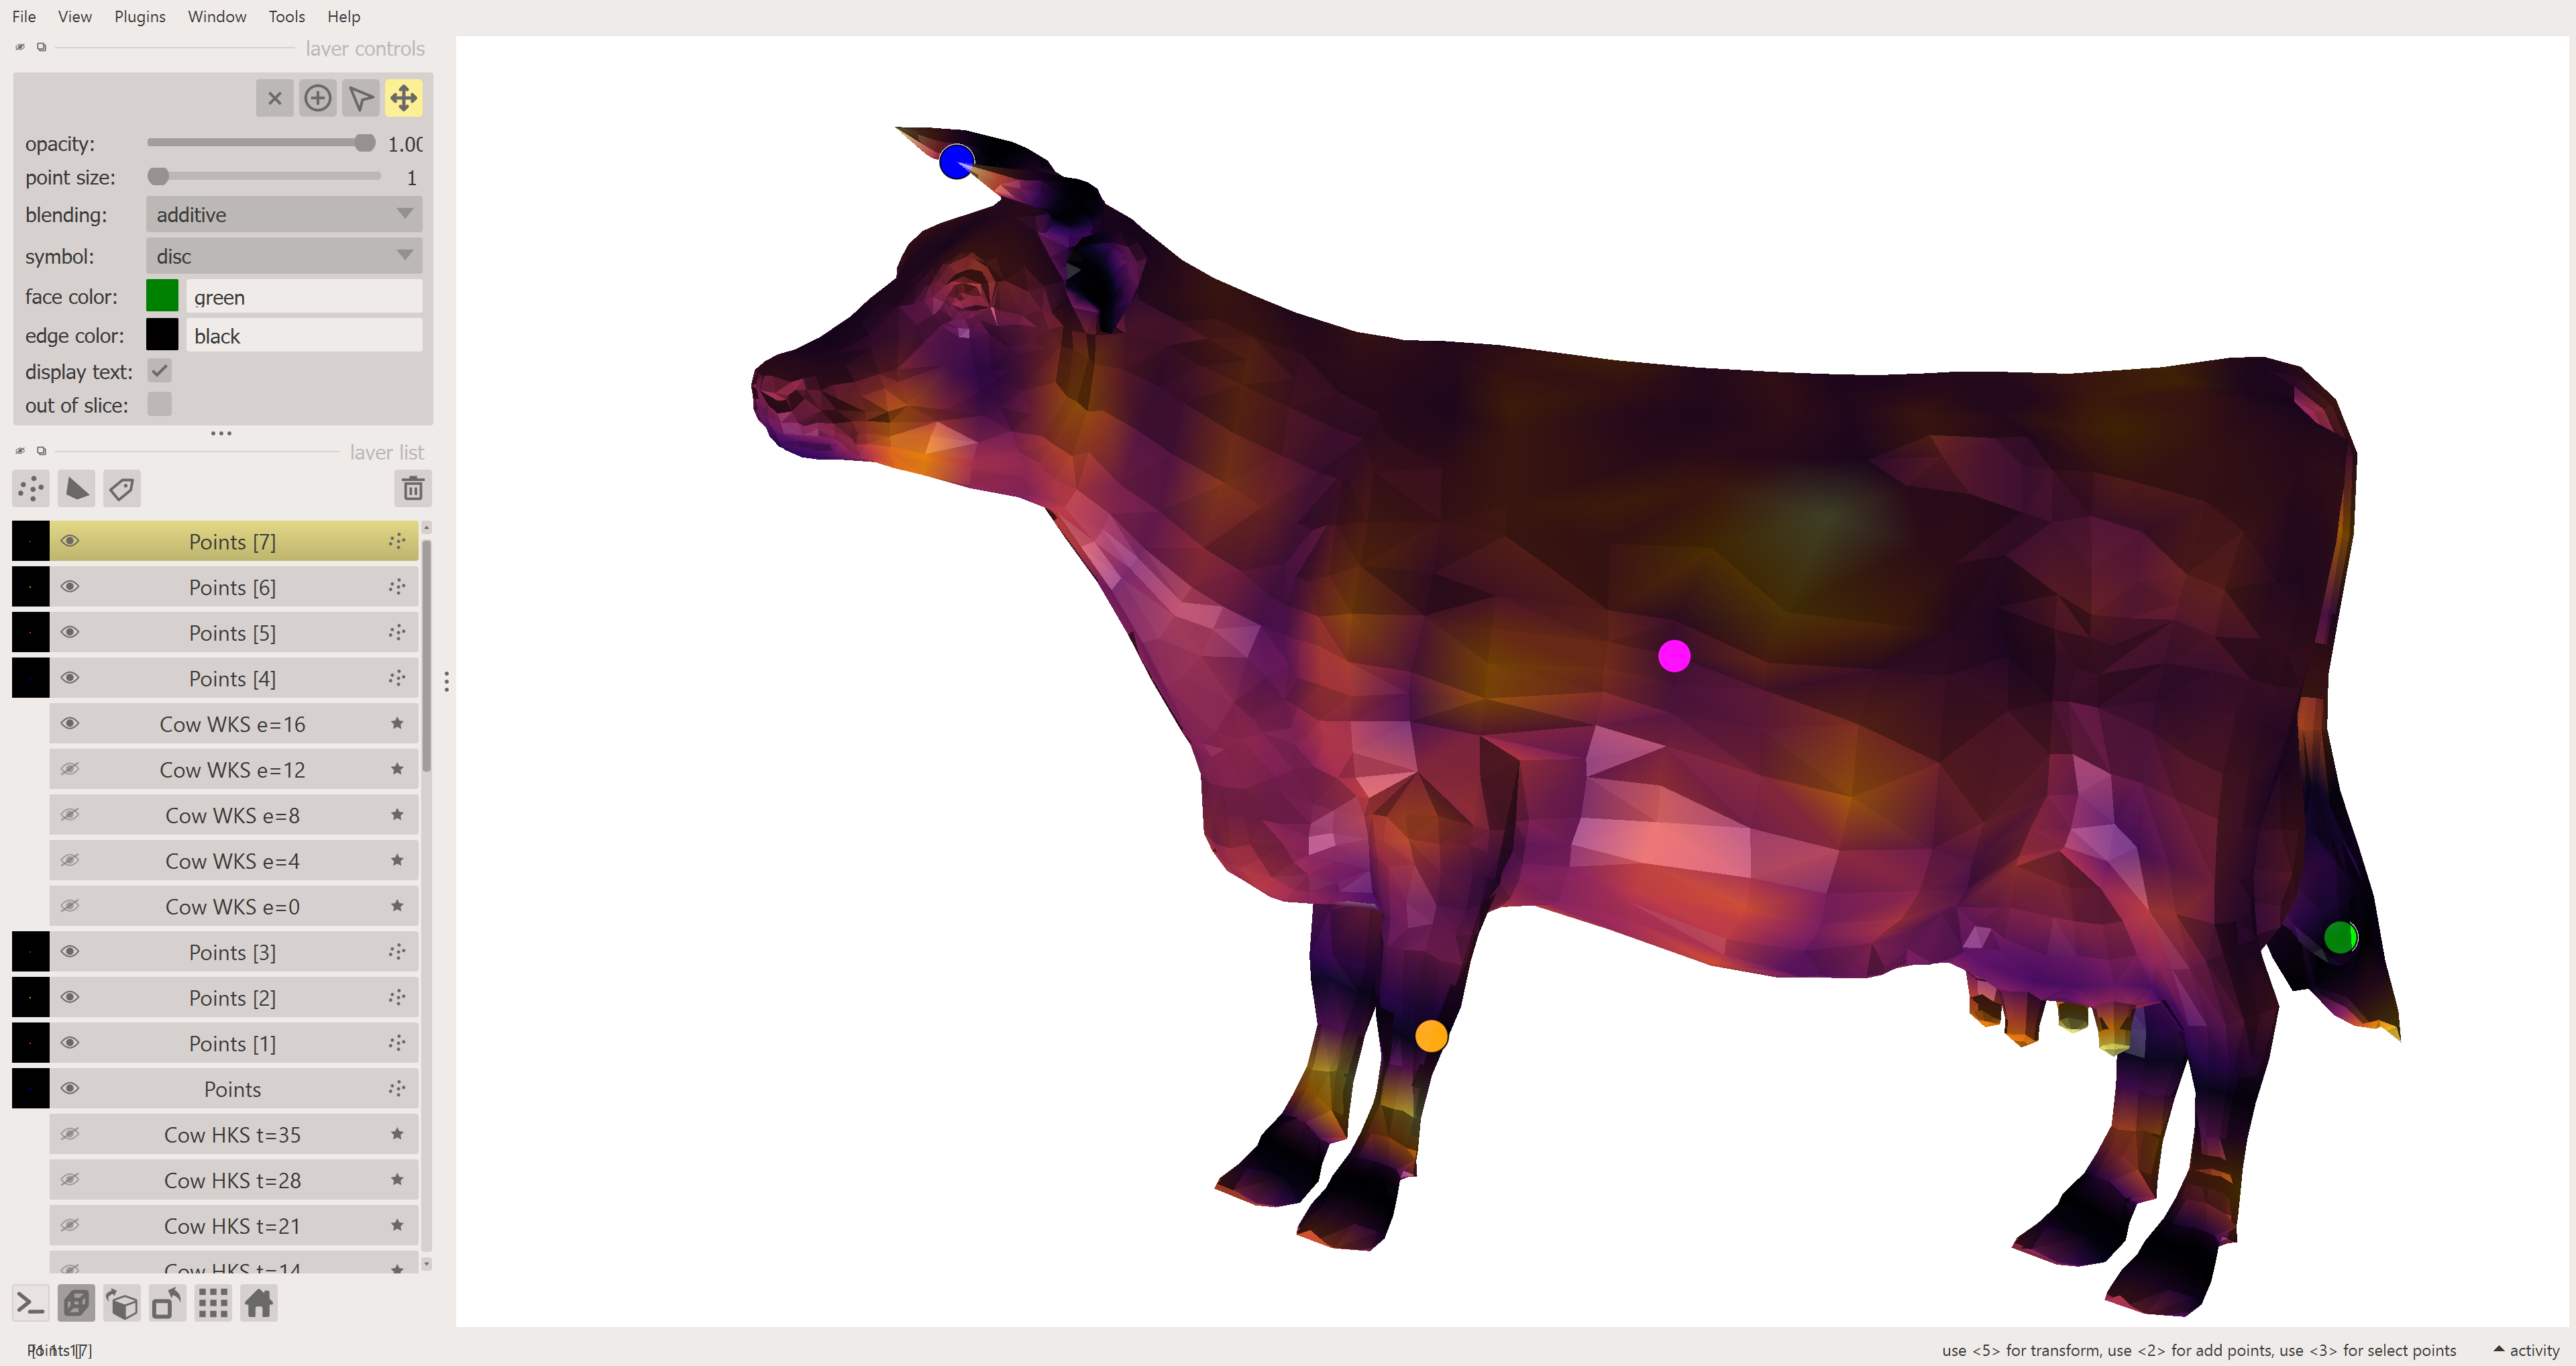

In [27]:
pt_settings = {'size': 0.1, 'edge_color': 'black', 'blending': 'additive'}
viewer.add_points(shape2.points()[point1], **pt_settings, face_color='blue')
viewer.add_points(shape2.points()[point2], **pt_settings, face_color='magenta')
viewer.add_points(shape2.points()[point3], **pt_settings, face_color='orange')
viewer.add_points(shape2.points()[point4], **pt_settings, face_color='green')
layer.visible = True
napari.utils.nbscreenshot(viewer)

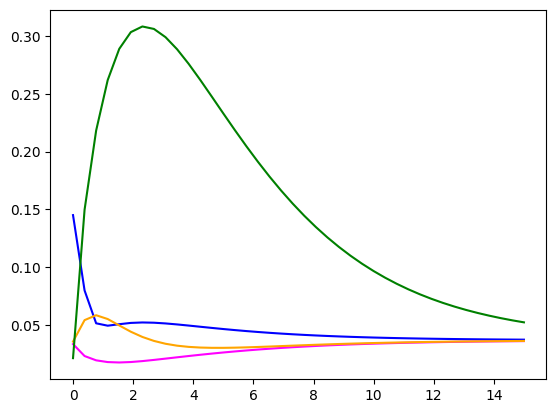

In [11]:
times = np.linspace(0, 15, 40)
signature = nso.signatures.heat_kernel_signature((shape2.points(), np.asarray(shape2.faces())),
                                                 times=times, scaled=True, robust=True)

fig, ax = plt.subplots()
ax.plot(times, signature[point1, :], label='Signature 1', color='blue')
ax.plot(times, signature[point2, :], label='Signature 2', color='magenta')
ax.plot(times, signature[point3, :], label='Signature 3', color='orange')
ax.plot(times, signature[point4, :], label='Signature 3', color='green')

### Clustering

Lte's try some unsupervised machine learning. The plot above shows us that the most interesting part of the story happens in the earlier timepoints, sho we'll only look at these values.

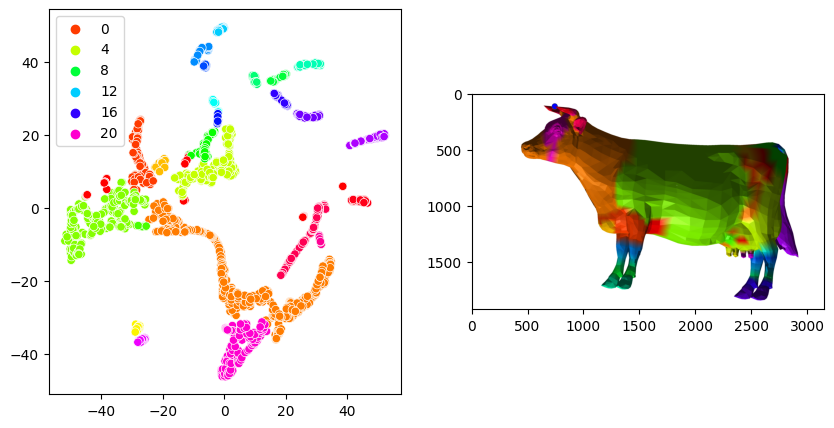

In [12]:
df = pd.DataFrame(signature[:, :20], columns=times[:20])
reducer = manifold.TSNE(n_components=2, perplexity=50, random_state=0)
embedding = reducer.fit_transform(df)

clusterer = cluster.DBSCAN(eps=2.5, min_samples=20)
clusterer.fit(embedding)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=clusterer.labels_, palette='hsv', ax=axes[0])
layer = viewer.add_surface((shape2.points(), np.asarray(shape2.faces()), clusterer.labels_), colormap='hsv')
screenshot = viewer.screenshot()
layer.visible = False
axes[1].imshow(screenshot)

## Wave kernel

Let's do the same thing with the wave kernel.

In [21]:
energies = np.linspace(0, 10, 20)
e_visualize = np.arange(0, 20, 4)
energies

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

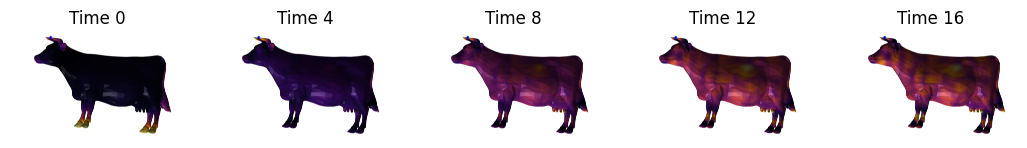

In [25]:
signature = nso.signatures.wave_kernel_signature((shape2.points(), np.asarray(shape2.faces())), energies=energies)
fig, axes = plt.subplots(ncols=len(e_visualize), figsize=(13, 7))

for i in range(len(e_visualize)):
    mesh_tuple = (shape2.points(), np.asarray(shape2.faces()), signature[:, e_visualize[i]])
    layer = viewer.add_surface(mesh_tuple, colormap='inferno', name=f'Cow WKS e={e_visualize[i]}')
    viewer.camera.angles = (86, 0, -15)
    viewer.camera.zoom = 250
    viewer.camera.center = (-0.175, 0.621, -0.119)
    screenshot = viewer.screenshot()
    layer.visible = False
    axes[i].imshow(screenshot)
    axes[i].axis('off')
    axes[i].set_title(f'Time {e_visualize[i]}')

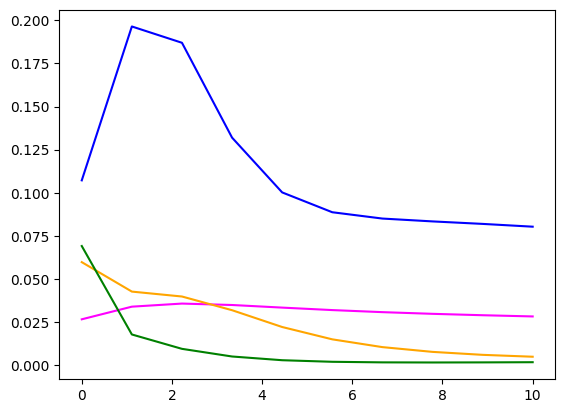

In [29]:
energies = np.linspace(0, 10, 10)
signature = nso.signatures.wave_kernel_signature((shape2.points(), np.asarray(shape2.faces())),
                                                 energies=energies, scaled=True, robust=True)

fig, ax = plt.subplots()
ax.plot(energies, signature[point1, :], label='Signature 1', color='blue')
ax.plot(energies, signature[point2, :], label='Signature 2', color='magenta')
ax.plot(energies, signature[point3, :], label='Signature 3', color='orange')
ax.plot(energies, signature[point4, :], label='Signature 3', color='green')

### Clustering

Lte's try some unsupervised machine learning. Rhe plot above shows that the quantum-mechanical energy levels are a bit more informative also for higher energies, so we can use them as well.

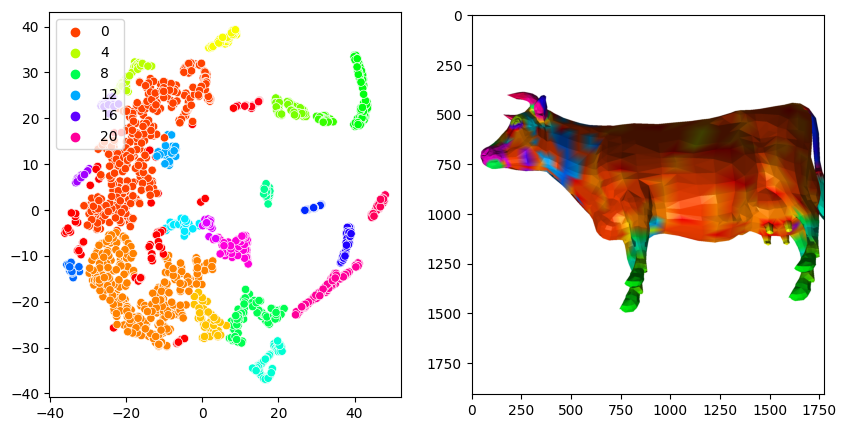

In [88]:
df = pd.DataFrame(signature, columns=[f'{i}' for i in range(signature.shape[1])])
reducer = manifold.TSNE(n_components=2, perplexity=60, random_state=0)
embedding = reducer.fit_transform(df)

clusterer = cluster.DBSCAN(eps=2.5, min_samples=20)
clusterer.fit(embedding)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=clusterer.labels_, palette='hsv', ax=axes[0])
layer = viewer.add_surface((shape2.points(), np.asarray(shape2.faces()), clusterer.labels_), colormap='hsv')
screenshot = viewer.screenshot()
layer.visible = False
axes[1].imshow(screenshot)